In [17]:
import torch
from torchvision import datasets, transforms
import torchvision
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
class CNN_wr(torch.nn.Module):
    learning_rate=0.1
    def __init__(self):
        # 调用nn初始化
        super(CNN_wr, self).__init__()
        # 超参数
        
        input_feature = 1
        
        
        feature_1 = 64
        feature_2 = 128
        
        # 搭建第一层
        self.conv1 = torch.nn.Sequential(torch.nn.Conv2d(input_feature,feature_1,kernel_size=5,stride=1,padding=0),
                                         torch.nn.ReLU(),
                                         torch.nn.MaxPool2d(kernel_size=2,stride=2))
        # 第二层
        self.conv2 = torch.nn.Sequential(torch.nn.Conv2d(feature_1,feature_2,kernel_size=3,stride=1,padding=0),
                                         torch.nn.ReLU(),
                                         torch.nn.MaxPool2d(kernel_size=2,stride=2))
        # 全连接层
        self.dense = torch.nn.Sequential(torch.nn.Linear(128*5*5,256),
                                         torch.nn.ReLU(),
                                        #  torch.nn.Dropout(p=0.5),
                                         torch.nn.Linear(256, 10))
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.shape[0], -1)
        x = self.dense(x)
        return x

In [11]:
# 预处理函数
transform_func = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.5],std=[0.5])])
# 加载数据
test_dataset = datasets.MNIST(root='./data/',
				train=False,
				transform=transform_func,
				download=False)

In [19]:
# 加载模型
model = torch.load('./model/my_model.pth')

In [15]:
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


Predict Label is: [tensor(1, device='cuda:0'), tensor(3, device='cuda:0'), tensor(9, device='cuda:0'), tensor(9, device='cuda:0')]
Mark Label is: [tensor(1, device='cuda:0'), tensor(3, device='cuda:0'), tensor(9, device='cuda:0'), tensor(9, device='cuda:0')]


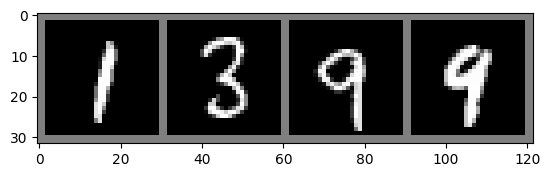

In [21]:
# 使用模型预测
data_loader_test = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size = 4,
                                          shuffle = True)
X_test, y_test = next(iter(data_loader_test))
X_test = X_test.to(device)
y_test = y_test.to(device)
inputs = Variable(X_test)
pred = model(inputs)
_,pred = torch.max(pred, 1)

print("Predict Label is:", [ i for i in pred.data])
print("Mark Label is:",[i for i in y_test])

img = torchvision.utils.make_grid(X_test)
img = img.cpu()
img = img.numpy().transpose(1,2,0)

std  = [0.5,0.5,0.5]
mean = [0.5,0.5,0.5]
img = img*std+mean
plt.imshow(img)